In [77]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [78]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Check expression to RNA normalized data

In [3]:
raw = pd.read_csv('/nrnb/users/mpagadal/tcga-genotypes/germline-immune/immune.snp.raw',sep=' ')
raw.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,1:1421752:G:A_A,1:7841330:G:A_A,1:7847836:C:T_T,1:7969014:G:A_A,...,19:55174498:T:C_C,19:55175740:C:T_T,19:55175983:T:A_A,19:55188593:G:C_C,19:55225076:C:A_A,20:8141433:G:T_T,20:50500689:T:A_A,20:50506724:G:C_C,20:59393575:C:T_T,21:46328099:C:T_T
0,TCGA-01-0628,TCGA-01-0628,0,0,2,-9,0,0,2,0,...,0,2,0,2,0,2,0,0,0,2
1,TCGA-01-0630,TCGA-01-0630,0,0,2,-9,1,0,2,0,...,0,0,0,1,0,1,0,0,1,1
2,TCGA-01-0633,TCGA-01-0633,0,0,2,-9,1,0,1,1,...,1,1,1,0,1,0,0,0,0,1
3,TCGA-01-0636,TCGA-01-0636,0,0,2,-9,1,0,0,2,...,0,1,0,0,2,2,0,0,1,0
4,TCGA-01-0637,TCGA-01-0637,0,0,2,-9,2,0,0,1,...,0,1,0,0,0,2,0,0,0,1


In [4]:
tpm=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/discovery/phenotypes/processed_phenos/tpm/tumor/pheno_all_zcancer",delimiter="\t")
firebrowse=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/discovery/phenotypes/processed_phenos/firebrowse/tumor/pheno_all_zcancer",delimiter="\t")
pancan=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/discovery/phenotypes/processed_phenos/pancanatlas/tumor/pheno_all_zcancer",delimiter="\t")

In [9]:
canc = pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/birdseed-processing/gtype.meta", delimiter="\t", header=None)
mp = canc.set_index(2)[0].to_dict()

tpm["cancer"]=tpm["FID"].map(mp)
firebrowse["cancer"]=firebrowse["FID"].map(mp)
pancan["cancer"]=pancan["FID"].map(mp)

In [68]:
geno_immune=pd.merge(raw,tpm,on=["FID","IID"])

In [79]:
snps=pd.read_csv("../../snp-tables/immune-microenvironment-nonhla.tsv",delimiter="\t")

In [80]:
snps[snps["rsid"].str.contains("rs2098952")]

,snps,file,category,maf,variant,rsid,tpm beta,tpm SE,tpm P,REF,ALT,firebrowse beta,firebrowse SE,firebrowse P,pancan beta,pancan SE,pancan P,p-value,cis tss,gwas
4,19:55145546:T:G,LILRB4,immunomodulators,0.1145,chr19:g.55145546T>G,rs2098952,-0.288007,0.025738,7.953270e-29,T,G,-0.05727,0.026471,0.030539,-0.052444,0.025963,0.043429,7.953270e-29,28724.0,"['Blood protein levels', 'Interleukin-18 levels']"


In [71]:
snp=[x for x in geno_immune.columns if "1:88665329" in x][0]
snp=[x for x in geno_immune.columns if snp in x][0]
gene="CCBL2"

In [72]:
geno_immune_gene=geno_immune[~(geno_immune[gene]==-9)]

In [73]:
geno_immune_gene=geno_immune_gene[geno_immune_gene["cancer"]=="STAD"]

In [74]:
geno_immune_gene

,FID,IID,PAT,MAT,SEX,PHENOTYPE,1:1421752:G:A_A,1:7841330:G:A_A,1:7847836:C:T_T,1:7969014:G:A_A,...,NSCLC.Fig2ab.B.cells,dice.CD8_STIM,dice.M2,dice.TH1,dice.TH17,HNSCC.Fibroblast,HNSCC.Endothelial,melanoma.CAF,melanoma.Macrophages,cancer
3062,TCGA-B7-5816,TCGA-B7-5816,0,0,2,-9,1,0,0,0,...,-1.436578,0.183063,-0.028011,-0.448723,-0.930803,0.433289,0.254793,0.714593,0.042023,STAD
3063,TCGA-B7-5818,TCGA-B7-5818,0,0,1,-9,0,0,1,0,...,0.014004,-1.146964,-1.294390,1.957580,0.808167,-0.495692,1.729057,-0.952621,1.566129,STAD
3064,TCGA-B7-A5TI,TCGA-B7-A5TI,0,0,1,-9,0,0,1,0,...,0.930803,0.560089,-0.342674,0.283836,0.769931,0.154653,1.327457,0.327861,-0.543781,STAD
3065,TCGA-B7-A5TJ,TCGA-B7-A5TJ,0,0,1,-9,0,1,1,1,...,0.225964,-2.391936,0.357563,0.888445,1.232193,0.560089,0.930803,0.479919,-0.560089,STAD
3066,TCGA-B7-A5TK,TCGA-B7-A5TK,0,0,1,-9,0,0,1,0,...,-1.262681,-0.327861,-1.566129,2.391936,0.543781,0.313119,-1.520077,-0.626898,0.372531,STAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,TCGA-VQ-AA6K,TCGA-VQ-AA6K,0,0,1,-9,0,0,2,1,...,-0.126367,0.112263,-0.593162,0.028011,0.827734,-0.042023,1.174428,0.661362,-0.154653,STAD
7768,TCGA-VQ-AA64,TCGA-VQ-AA64,0,0,1,-9,0,0,1,1,...,0.827734,0.283836,1.120338,1.729057,0.225964,0.909420,-0.098182,2.391936,-2.771108,STAD
7769,TCGA-VQ-AA69,TCGA-VQ-AA69,0,0,1,-9,0,1,1,2,...,0.464265,1.146964,-0.126367,-1.044856,-0.930803,-2.198227,1.294390,-0.867853,1.520077,STAD
8109,TCGA-ZA-A8F6,TCGA-ZA-A8F6,0,0,1,-9,1,0,1,0,...,0.788905,-0.930803,2.063068,0.609943,0.000000,1.020983,-0.140496,-0.014004,0.511589,STAD


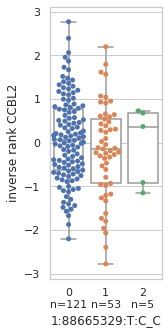

In [75]:
sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(2,5))
ax=sns.boxplot(x=snp,y=gene,data=geno_immune_gene,color="white")
ax=sns.swarmplot(x=snp,y=gene,data=geno_immune_gene)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels=[x+"\nn="+str(len(geno_immune_gene[geno_immune_gene[snp]==int(x)])) for x in labels]

ax.set_xticklabels(labels)
plt.ylabel("inverse rank "+gene)


plt.savefig("/cellar/users/mpagadal/Data2/projects/germline-immune/investigation/plots/"+snp+"."+gene+".pdf")

## Get HUGO FPKM

In [11]:
fpkm=pd.read_csv("/cellar/users/mpagadal/Data/resources/tcga/fpkm-compile/tcga-hugo-fpkm-compiled",delimiter="\t")

In [12]:
mp_fpkm=pd.read_csv("/cellar/users/mpagadal/Data/resources/from-labmembers/andrea/uuid_barcode_map.txt",delimiter="\t")

In [13]:
mp_fpkm["file_name"]=mp_fpkm["file_name"].str.split(".gz").str[0]

In [14]:
mp_fpkm=dict(zip(mp_fpkm["file_name"],mp_fpkm["sample_barcode"]))

In [15]:
cols=[]

for x in fpkm.columns:
    try:
        cols.append(mp_fpkm[x])
    except:
        cols.append(x)

In [16]:
fpkm.columns=cols

In [17]:
fpkm.head()

,ENSEMBL,TCGA-BG-A0MC-01A,HUGO,TCGA-E9-A1RC-11A,TCGA-DK-A1AC-01A,TCGA-BJ-A192-01A,TCGA-CV-5439-01A,TCGA-EL-A3N2-11A,TCGA-AX-A1CJ-01A,TCGA-DM-A280-01A,...,TCGA-A5-A0R9-01A,TCGA-IG-A3I8-01A,TCGA-SX-A71V-01A,TCGA-SX-A7SQ-01A,TCGA-05-4418-01A,TCGA-A2-A0YJ-01A,TCGA-CK-6748-01A,TCGA-CR-7365-01A,TCGA-H2-A421-01A,TCGA-43-3394-01A
0,ENSG00000242268.2,0.082829,RP11-368I23.2,1.001529,0.044982,0.000000,0.000000,0.000000,0.546947,0.000000,...,0.000000,0.016005,0.131952,0.676258,0.000000,0.000000,0.000000,0.000000,2.063867,0.000000
1,ENSG00000270112.3,0.000000,RP11-742D12.2,0.005053,0.000000,0.212113,0.000000,0.002555,0.000000,0.000000,...,0.000000,0.019986,0.000000,0.000000,0.000000,0.000000,0.003388,0.002720,0.010320,0.006392
2,ENSG00000167578.15,8.857925,RAB4B,1.799594,4.757692,3.900774,2.318098,1.574006,11.873389,2.995032,...,4.508456,2.814157,2.075035,2.595237,4.194652,1.874345,2.003841,1.279847,4.878818,2.251242
3,ENSG00000273842.1,0.000000,AC104183.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,1.128321,C12orf5,1.997276,5.578142,6.452027,7.492383,0.514639,1.525455,4.961469,...,1.936859,2.398235,5.913091,3.195661,10.157993,4.989331,3.045606,4.682713,3.144209,10.894560


In [18]:
keep_cols=[x for x in fpkm.columns if x[13:15]=="01"]

In [19]:
fpkm=fpkm.set_index("HUGO")
fpkm_tumor=fpkm[keep_cols]

In [20]:
fpkm_tumor=fpkm_tumor.T
fpkm_tumor.index=fpkm_tumor.index.str[0:12]

In [21]:
fpkm_tumor=fpkm_tumor.reset_index()

In [22]:
fpkm_tumor=fpkm_tumor.rename(columns={"index":"FID"})

In [23]:
fpkm_tumor=fpkm_tumor.groupby("FID").mean()

In [24]:
fpkm_tumor.head()

HUGO,RP11-368I23.2,RP11-742D12.2,RAB4B,AC104183.2,C12orf5,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,GABARAPL3,CYP4F2,RP11-486E2.1,AC010525.4,RP11-713D19.1,PPP6R1,RP4-569M23.2,AC009260.1,BATF3,OR8D4
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047,1.394336,0.120918,4.457040,0.0,5.608130,9.611185,0.0,0.003309,82.495270,0.096301,...,0.0,0.110278,0.018347,0.056121,0.232389,12.955587,0.574614,0.0,3.174645,0.0
TCGA-02-0055,0.000000,0.016449,3.816159,0.0,5.366732,5.208533,0.0,0.014066,208.344332,0.000000,...,0.0,0.006697,0.000000,0.238575,0.197580,10.583493,1.360946,0.0,5.258642,0.0
TCGA-02-2483,0.105521,0.014641,4.186546,0.0,6.592378,8.041341,0.0,0.002504,241.182395,0.145759,...,0.0,0.000000,0.000000,0.000000,0.087934,10.717918,0.072477,0.0,1.366954,0.0
TCGA-02-2485,0.747111,0.058052,7.431937,0.0,7.454003,9.499339,0.0,0.004255,155.047234,0.055040,...,0.0,0.020259,0.000000,0.000000,0.199229,14.397772,0.164207,0.0,2.666906,0.0
TCGA-02-2486,0.166204,0.000000,5.676945,0.0,9.009440,6.463168,0.0,0.015776,148.809904,0.061222,...,0.0,0.007511,0.000000,0.107034,0.055401,10.224824,0.756693,0.0,7.985885,0.0


In [25]:
fpkm_tumor+=1
fpkm_tumor=np.log2(fpkm_tumor)

In [26]:
geno_immune=pd.merge(raw,fpkm_tumor,on="FID",how="left")

In [27]:
snp=[x for x in geno_immune.columns if "6:58602122:A:G" in x][0]
gene="LINC00680"

Text(0, 0.5, 'log2 FPKM LINC00680')

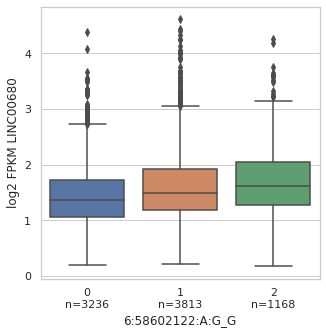

In [28]:
sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(5,5))
ax=sns.boxplot(x=snp,y=gene,data=geno_immune)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels=[x+"\nn="+str(len(geno_immune[geno_immune[snp]==int(x)])) for x in labels]

ax.set_xticklabels(labels)
plt.ylabel("log2 FPKM "+gene)


## Get gtex trans dataframe

In [29]:
snps=pd.read_csv("../snp-tables/immune-microenvironment-sig.tsv",delimiter="\t")

FileNotFoundError: [Errno 2] File ../snp-tables/immune-microenvironment-sig.tsv does not exist: '../snp-tables/immune-microenvironment-sig.tsv'

In [ ]:
snps[snps["snps"]=="6:58602122:A:G"]

In [ ]:
linc=linc[linc["assoc"].str.contains("5:49507235:G:A")]

In [ ]:
genes=snps[snps["snps"]=="6:58602122:A:G"]["file"].tolist()

In [ ]:
snp=["6:58602122:A:G_G"]

In [ ]:
cols=[x for x in set(snp+genes+["LINC00680"])]

In [ ]:
linc_geno_immune=geno_immune[cols]

In [ ]:
mean=linc_geno_immune.groupby(snp).mean()

In [ ]:
std=linc_geno_immune.groupby(snp).std()

In [ ]:
std=std/3

In [ ]:
mean

In [ ]:
plt.figure(figsize=(6,5))
for i in mean.columns:
    if i!= "LINC00680":
        print(i)
        plt.errorbar([0,1,2], mean[i].tolist(), yerr=std[i].tolist(),label=i) 
plt.legend()
plt.grid(b=None)
plt.ylabel("log2 FPKM")
plt.savefig("../plots/LINC00680.mac.pdf", bbox_inches='tight')

In [ ]:
plt.figure(figsize=(6,2))
plt.errorbar([0,1,2], mean["LINC00680"].tolist(), yerr=std["LINC00680"].tolist(),label="LINC00680") 
plt.legend()
plt.ylabel("log2 FPKM")
plt.grid(b=None)
plt.savefig("../plots/LINC00680.pdf", bbox_inches='tight')

## Make network of LINC00680 snps